In this tutorial we have tried to give a brief idea on how Ridge and LASSO regression work in code, with a simple data of advertising data set.

**Ridge Regression:**
1. Performs regularization, adds penalty equivalent to sum of squares of the coefficients
2. Its objective is to minimize (LinearRegression loss function +  * λ(sum of square of coefficients))

  **f(w) = ||w||2 = ∑j|wj|^2**

  **Objective Function (to be minimized) = L(w,b)(linear regression loss function) + λf(w)**

**LASSO Regression:**
1. Performs regularization, adds penalty equivalent to absolute value of the magnitude of coefficients
2. it's objective is to minimize (Linear Regression loss function + λ * (sum of absolute values of coefficients):

 **f(w) = ||w||1 = ∑j|wj|**

 **Objective Function = L(w,b)(linear regression loss function) + λf(w)**

**Insights into dataset:**

In [1]:
# importing importent libraries we are going to use throughout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data (is taken from kaggle: https://www.kaggle.com/sazid28/advertising.csv)
sales_data = pd .read_csv('Advertising.csv',index_col=0)
sales_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Taking a look into data's
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


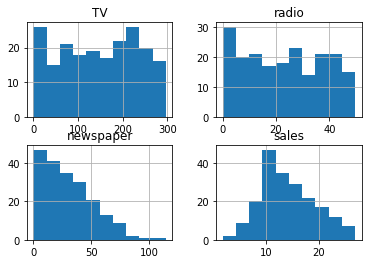

In [4]:
# To see the distribution range of data's
sales_data.hist();

Text(0, 0.5, 'sales')

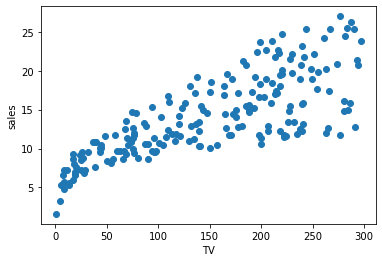

In [5]:
plt.scatter(sales_data['TV'], sales_data['sales'])
plt.xlabel('TV')
plt.ylabel('sales')

Text(0, 0.5, 'sales')

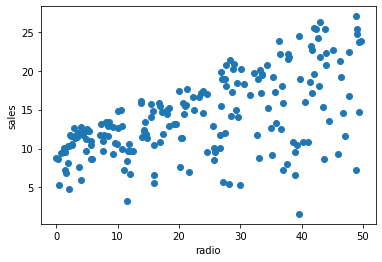

In [6]:
plt.scatter(sales_data['radio'], sales_data['sales'])
plt.xlabel('radio')
plt.ylabel('sales')

Text(0, 0.5, 'sales')

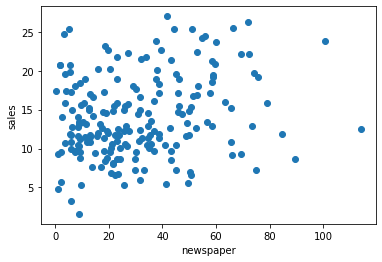

In [7]:
plt.scatter(sales_data['newspaper'], sales_data['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')

From the above graphs we can conclude that advertising on TV or radio is more linearly related with sales.

### Linear Regression

In [5]:
# Let's start with Linear Regression and then we see the effect of Ridge and LASSO over Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# For regenrating the result
np.random.seed(42)

# Chhose X and y
X=sales_data.drop('sales', axis=1)
y=sales_data['sales']

# Spliting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set model
l_reg=LinearRegression()

# fit and find accuracy
l_reg.fit(X_train, y_train)
print(f'Accuracy we obtain from simple linear regression is: {l_reg.score(X_test, y_test)*100:.2f}%')

y_pred_lr = l_reg.predict(X_test)

Accuracy we obtain from simple linear regression is: 89.94%


C:\Users\Dell\AppData\Local\Temp/ipykernel_4192/4057996634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dell\AppData\Local\Temp/ipykernel_4192/4057996634.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

<AxesSubplot:xlabel='sales', ylabel='Density'>

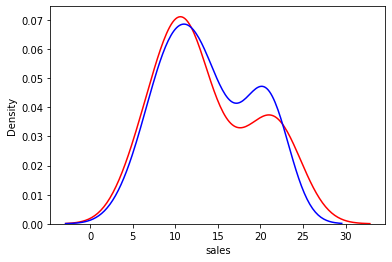

In [6]:
# Comparing actual value and fitted value
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_lr, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Ridge Regression

In [7]:
# We do the same with Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# For regenrating the result
np.random.seed(42)

# Chhose X and y
X=sales_data.drop('sales', axis=1)
y=sales_data['sales']

# Spliting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set and fit our model for different value of lembda (alpha)
for num in [1e-15, 1e-10, 1e-5, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=num)

    # fit and score the model
    ridge.fit(X_train, y_train)
    print(f'Accuracy we obtain from Ridge regressor with lembda {num} is: {ridge.score(X_test, y_test)*100:.2f}%')

# predicting y for the y_test with best fitting
ridge = Ridge(alpha=1)
y_pred_ridge=ridge.fit(X_train, y_train).predict(X_test)
y_pred_ridge

Accuracy we obtain from Ridge regressor with lembda 1e-15 is: 89.94%
Accuracy we obtain from Ridge regressor with lembda 1e-10 is: 89.94%
Accuracy we obtain from Ridge regressor with lembda 1e-05 is: 89.94%
Accuracy we obtain from Ridge regressor with lembda 1 is: 89.94%
Accuracy we obtain from Ridge regressor with lembda 10 is: 89.94%
Accuracy we obtain from Ridge regressor with lembda 100 is: 89.94%
Accuracy we obtain from Ridge regressor with lembda 1000 is: 89.93%


array([16.40800912, 20.88976488, 21.55383372, 10.60843829, 22.11216081,
       13.10555353, 21.05705405,  7.46106061, 13.60644116, 15.15507511,
        9.04825872,  6.65339089, 14.3457663 ,  8.90341069,  9.68971658,
       12.16504935,  8.73626902, 16.26504282, 10.27761577, 18.83102941,
       19.56038524, 13.25109382, 12.33606288, 21.30694021,  7.82743747,
        5.8096912 , 20.75741172, 11.9813993 ,  9.1835584 ,  8.50662087,
       12.46658209, 10.00337061, 21.38755538, 12.24963379, 18.26668657,
       20.13754774, 14.05494747, 20.85412731, 11.01745264,  4.56911393])

C:\Users\Dell\AppData\Local\Temp/ipykernel_4192/424523066.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dell\AppData\Local\Temp/ipykernel_4192/424523066.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

<AxesSubplot:xlabel='sales', ylabel='Density'>

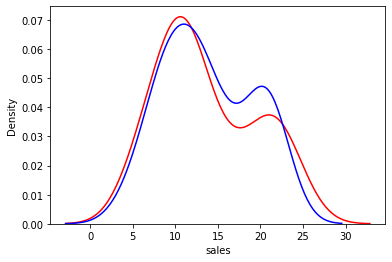

In [8]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)

### LASSO Regression

In [9]:
# We do the same with Ridge regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# For regenerating the result
np.random.seed(42)

# Chhose X and y
X=sales_data.drop('sales', axis=1)
y=sales_data['sales']

# Spliting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set and fit our model for different value of lembda (alpha)
for num in [1e-15, 1e-10, 1e-5, 1, 10, 100, 1000]:
    lasso = Lasso(alpha=num)

    # fit and score the model
    lasso.fit(X_train, y_train)
    print(f'Accuracy we obtain from Ridge regressor with lambda {num} is: {lasso.score(X_test, y_test)*100:.2f}%')
# predicting y for the y_test with best fitting
lasso = Lasso(alpha=1)
y_pred_lasso=lasso.fit(X_train, y_train).predict(X_test)
y_pred_lasso

Accuracy we obtain from Ridge regressor with lambda 1e-15 is: 89.94%
Accuracy we obtain from Ridge regressor with lambda 1e-10 is: 89.94%
Accuracy we obtain from Ridge regressor with lambda 1e-05 is: 89.94%
Accuracy we obtain from Ridge regressor with lambda 1 is: 90.04%
Accuracy we obtain from Ridge regressor with lambda 10 is: 89.05%
Accuracy we obtain from Ridge regressor with lambda 100 is: 59.15%
Accuracy we obtain from Ridge regressor with lambda 1000 is: -0.48%


array([16.34243054, 20.75921812, 21.50111725, 10.54782778, 22.04080648,
       13.03591171, 20.9734386 ,  7.52970731, 13.69662642, 15.15195335,
        9.09056025,  6.72891781, 14.33861192,  8.9182951 ,  9.77498375,
       12.21387221,  8.71496513, 16.27982422, 10.29146229, 18.83004708,
       19.45701463, 13.09383443, 12.30445517, 21.1878815 ,  7.92649991,
        5.91081596, 20.66872683, 12.04108347,  9.23770341,  8.54136057,
       12.55121049, 10.03609345, 21.24061721, 12.10314104, 18.27875991,
       20.11802973, 14.00116475, 20.77888074, 11.08499013,  4.67528269])

C:\Users\Dell\AppData\Local\Temp/ipykernel_4192/568275364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dell\AppData\Local\Temp/ipykernel_4192/568275364.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

<AxesSubplot:xlabel='sales', ylabel='Density'>

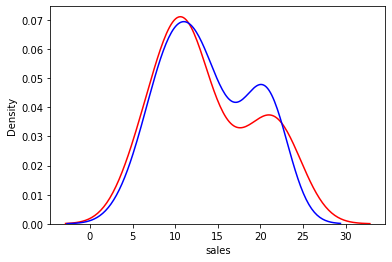

In [10]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_lasso, hist=False, color="b", label="Fitted Values" , ax=ax1)